In [9]:
import lib.csv_helpers as csv
from IPython.display import display
import shutil

#Delete any existing dummy data
shutil.rmtree('dummydata')

## Generate Dummy Data
for testing / demo purposes.
Includes random surface chemistry mapping

In [1]:
import lib.csv_helpers as csv
from IPython.display import display
import lib.json_setup as json_setup

print("Generating metadata run list with the following settings")

# Start with the example setup dictionary
setup = csv.get_default_setup()

run_df = csv.generate_run_df(setup)
run_df
# Iterate through the run_df calling dummy_measurement for each row,
# Stores the results in the path/subdirs defined in setup. 
# csv.run_measure(setup, run_df, measure_func=csv.dummy_measurement)


Generating metadata run list with the following settings


,date,instrument,sensor,element,structure,surface,fluid,repeats,comment
index,,,,,,,,,
default_sensor-A01-waterA,NaT,default_instrument,default_sensor,A01,Al,None,waterA,3,
default_sensor-A02-waterA,NaT,default_instrument,default_sensor,A02,Au,None,waterA,3,
default_sensor-B01-waterA,NaT,default_instrument,default_sensor,B01,Al,HMDS,waterA,3,
default_sensor-B02-waterA,NaT,default_instrument,default_sensor,B02,Au,DT,waterA,3,
default_sensor-C01-waterA,NaT,default_instrument,default_sensor,C01,Al,PEG,waterA,3,
default_sensor-C02-waterA,NaT,default_instrument,default_sensor,C02,Au,PFDT,waterA,3,
default_sensor-A01-waterB,NaT,default_instrument,default_sensor,A01,Al,None,waterB,3,
default_sensor-A02-waterB,NaT,default_instrument,default_sensor,A02,Au,None,waterB,3,
default_sensor-B01-waterB,NaT,default_instrument,default_sensor,B01,Al,HMDS,waterB,3,


## Preview of csv spectrometer data
Simply displaying a csv measurement file with pandas

In [10]:
import os
import pandas as pd

# pd.options.display.max_rows= 15
dir = "dummydata/instrument01/waterA/"
testfile = "instrument01-A01-waterA.txt"
df = pd.read_csv(os.path.join(dir, testfile), sep='\t')

#label columns
reps = len(df.columns)-1
col_names = ['wavelength']
for r in range(reps):
	col_names.append(F"rep{r+1}")
df.columns = col_names
df

,wavelength,rep1,rep2,rep3,rep4,rep5,rep6
0,540.0,0.636037,0.788888,0.368024,0.260227,0.879727,0.414196
1,540.5,0.824837,0.350953,0.167499,0.742324,0.216747,0.599098
2,541.0,0.760054,0.709233,0.832965,0.295608,0.993233,0.339023
3,541.5,0.488788,0.708132,0.009932,0.611666,0.970723,0.036914
4,542.0,0.882736,0.036596,0.955018,0.277749,0.138286,0.087521
...,...,...,...,...,...,...,...
375,727.5,0.343285,0.828136,0.817357,0.225698,0.090470,0.268875
376,728.0,0.244205,0.366858,0.277609,0.514266,0.484996,0.836082
377,728.5,0.975111,0.450919,0.923167,0.682250,0.185712,0.455857
378,729.0,0.870955,0.024156,0.164604,0.144436,0.718655,0.541955


## Import from .txt or .csv files

### Input File

Requires a text file with at least 2 columns.
(They don't need to be named in the file)

[wavelength]	[transmission data 1]	...[transmission data n (optional)]

The default is for tab separation, but can be specified with:

separator = '\t'

### Regex
A regular expression must be provided to identify these Primary metadata fields from the filename:
* sensor
* element
* fluid

Optionally, extra fields can be identified, which will be added to the metadata:
* e.g. rotation


In [2]:
import lib.csv_helpers as csv
import lib.json_setup as json_setup
import os 
os.chdir('/Users/calum/spectrometer/')

#Folder containing text/csv files to import
input_dir = "/Users/calum/git/Glasgow/sampleData/combined"

# Construct a regex to extract metadata from the filename
# example 'HAN24_Sensor9_BeerBitter3_Rotation2.txt'
# regex = '(?P<sensor>.+)_Sensor(?P<element>.+)_(?P<fluid>.+)_Rotation(?P<rotation>.+).txt'
regex = '(?P<sensor>.+)_Sensor(?P<element>.+)_(?P<fluid>.+)_Rotation(.+).txt'

# setup = csv.get_default_setup()
setup_path = "/Users/calum/spectrometer/setup/HAN24.json"
setup = json_setup.json_to_dict(setup_path)

# Modify any of the example settings
setup['datadir'] = 'dummydata'
# setup['sensor']['structure_map']['map'] = {
#     '01'    : 'surfaceA',
#     '02'    : 'surfaceB',
#     '03'    : 'surfaceC',
#     '04'    : 'surfaceD',
#     '05'    : 'surfaceE',
#     '06'    : 'surfaceF',
#     '07'    : 'surfaceG',
#     '08'    : 'surfaceH',
#     '09'    : 'surfaceI',
#     '10'    : 'surfaceJ',
#     '11'    : 'surfaceK',
#     '12'    : 'surfaceL',
#     '13'    : 'surfaceM',
#     '14'    : 'surfaceN',
#     '15'    : 'surfaceO',
# }

csv.import_dir_to_csv(setup, input_dir, regex)
# json_setup.dict_to_json(setup, setup_path, overwrite=False)

INFO:root:Saving into new file dummydata/HAN24/BeerBitter1/HAN24-10-BeerBitter1.txt
INFO:root:Saving into new file dummydata/index.txt
INFO:root:Merging into existing dummydata/HAN24/BeerBitter1/HAN24-10-BeerBitter1.txt
INFO:root:Merging into existing dummydata/index.txt
INFO:root:Saving into new file dummydata/HAN24/BeerBitter2/HAN24-10-BeerBitter2.txt
INFO:root:Merging into existing dummydata/index.txt
INFO:root:Merging into existing dummydata/HAN24/BeerBitter2/HAN24-10-BeerBitter2.txt
INFO:root:Merging into existing dummydata/index.txt
INFO:root:Saving into new file dummydata/HAN24/BeerBitter3/HAN24-10-BeerBitter3.txt
INFO:root:Merging into existing dummydata/index.txt
INFO:root:Merging into existing dummydata/HAN24/BeerBitter3/HAN24-10-BeerBitter3.txt
INFO:root:Merging into existing dummydata/index.txt
INFO:root:Saving into new file dummydata/HAN24/BeerCorny1/HAN24-10-BeerCorny1.txt
INFO:root:Merging into existing dummydata/index.txt
INFO:root:Merging into existing dummydata/HAN24/

## Example of searching by metadata

select_from_metadata() returns a list of h5 nodes that match the
criteria.

It can search a full h5 file, or if a nodelist is provided, it will work from
that.

Search criteria must include a metadata key, and can optionally include a
metadata value

In [30]:
import lib.csv_helpers as csv
import os
import pandas as pd

setup = csv.get_default_setup()
os.chdir('/Users/calum/spectrometer/')

# meta_df = csv.read_metadata(setup)

# meta_df = csv.select_from_metadata('sensor', 'HAN24', meta_df)
# meta_df = csv.select_from_metadata('element', '01', meta_df)

dtypes = {
    'name'              : 'default_metadata_columns',
    # Column            : #Datatype
    'index'             : 'string',
    'date'              : 'datetime64[ns]',
    'instrument'        : 'string',
    'sensor'            : 'string',
    'element'           : 'string',
    'structure'         : 'string',
    'surface'           : 'string',
    'fluid'             : 'string',
    'repeats'           : 'Int64',
    'comment'           : 'string',
}
dtypes.pop('date')
dtypes.pop('name')

metapath = os.path.join(setup['datadir'], setup['metafile'])

meta_df = pd.read_csv(metapath,
                        sep='\t',
                        index_col='index',
                        parse_dates=['date'],
                        dtype=dtypes,
                        keep_default_na = False
                        )

meta_df



,date,instrument,sensor,element,structure,surface,fluid,repeats,comment
index,,,,,,,,,
default_sensor-A01-waterA,2022-03-29,default_instrument,default_sensor,A01,Al,None,waterA,1,
default_sensor-A01-waterAaa,2022-03-29,default_instrument,default_sensor,A01,Al,None,waterAaa,1,


## Export with Preprocessing

export_dataframes() takes a meta_df listing which measurements to export.
(In this case we select only fluid==Beer from the full set)

A DataProcessor object may also be passed, which will be applied to the
measurements during export.




In [5]:
import lib.csv_helpers as csv
import lib.data_process
os.chdir('/Users/calum/spectrometer/')


setup = csv.get_default_setup()
meta_df = csv.read_metadata(setup)
meta_df = csv.select_from_metadata('fluid', 'Beer', meta_df)
# meta_df = csv.select_from_metadata('element', '01', meta_df)
# meta_df = csv.select_from_metadata('sensor', 'DUM01', meta_df)

dp = lib.data_process.DataProcessor()
dp.apply_normalise = True
dp.apply_smooth = True
dp.apply_trim = True
dp.apply_interpolate = True
dp.apply_round = True

dp.smooth_points = 3
dp.wavelength_trim_min = 540
dp.wavelength_trim_max = 730
dp.round_decimals = 3
dp.interpolate_sampling_rate = 1.0

export = csv.export_dataframes(setup, meta_df, dp=dp, outfile='export.txt')
export


INFO:root:filtering by metadata "fluid" == "Beer"
INFO:root:filtering by metadata "element" == "01"
INFO:root:merging element 01
INFO:root:filtering by metadata "element" == "01"
INFO:root:Writing to export.txt ...
INFO:root:Done


Surface       <NA>                                                          \
Element         01                                                           
Wavelength 540.117 541.117 542.117 543.117 544.117 545.117 546.117 547.117   
rep01        0.996   0.972   0.944   0.933   0.945   0.926   0.947   0.963   
rep02        0.999   0.973   0.944   0.934   0.946   0.926   0.947   0.963   
rep03        1.000   0.975   0.943   0.935   0.944   0.925   0.946   0.965   
rep04        1.000   1.000   0.984   0.987   0.942   0.945   0.926   0.924   
rep05        0.997   1.000   0.986   0.988   0.944   0.949   0.930   0.928   
rep06        0.997   1.000   0.978   0.984   0.938   0.939   0.922   0.915   
rep07        0.997   0.997   0.995   0.996   0.980   0.968   0.985   1.000   
rep08        0.996   0.997   0.993   0.993   0.977   0.972   0.983   1.000   
rep09        0.999   0.996   0.992   0.993   0.975   0.972   0.980   1.000   

Surface                     ...                                          \
Element                     ...                                           
Wavelength 548.117 549.117  ... 720.117 721.117 722.117 723.117 724.117   
rep01        0.956   0.959  ...   0.882   0.900   0.932   0.940   0.939   
rep02        0.957   0.956  ...   0.882   0.900   0.928   0.933   0.942   
rep03        0.954   0.958  ...   0.877   0.907   0.930   0.937   0.946   
rep04        0.927   0.922  ...   0.862   0.891   0.882   0.902   0.908   
rep05        0.929   0.924  ...   0.865   0.894   0.875   0.906   0.918   
rep06        0.927   0.925  ...   0.858   0.892   0.882   0.895   0.894   
rep07        1.000   0.987  ...   0.917   0.922   0.912   0.922   0.960   
rep08        0.997   0.985  ...   0.925   0.925   0.920   0.920   0.967   
rep09        0.995   0.984  ...   0.924   0.914   0.915   0.914   0.977   

Surface                                             
Element                                             
Wavelength 725.117 726.117 727.117 728.117 729.117  
rep01        0.962   0.963   0.927   0.932   0.951  
rep02        0.950   0.951   0.924   0.929   0.945  
rep03        0.950   0.945   0.920   0.927   0.943  
rep04        0.898   0.892   0.878   0.885   0.881  
rep05        0.902   0.896   0.877   0.880   0.884  
rep06        0.886   0.884   0.868   0.887   0.877  
rep07        0.971   0.950   0.962   0.951   0.962  
rep08        0.976   0.959   0.956   0.949   0.957  
rep09        0.976   0.965   0.955   0.951   0.957  

[9 rows x 190 columns]

## Process and Plot data

In [8]:
import lib.data_process
import os
import pandas as pd
import lib.csv_helpers as csv

setup = csv.get_default_setup()
meta_df = csv.read_metadata(setup)


dp = lib.data_process.DataProcessor()
dp.apply_interpolate = True
dp.apply_normalise = True
dp.apply_trim = True
dp.apply_smooth = True

meta_df = csv.select_from_metadata('sensor', 'DUM01', meta_df)

# meta_df = csv.select_from_metadata('element', '01', meta_df)

merged_df, title = csv.merge_dataframes(setup, meta_df)
df = dp.process_dataframe(merged_df)
print(title)
df

# lib.data_process.plot(df)


INFO:root:filtering by metadata "sensor" == "DUM01"


ValueError: arange: cannot compute length

INFO:root:filtering by metadata "element" == "01"
INFO:root:filtering by metadata "fluid" == "BeerCorny1"


instrument: HAN24sample
element: 01
fluid: BeerCorny1


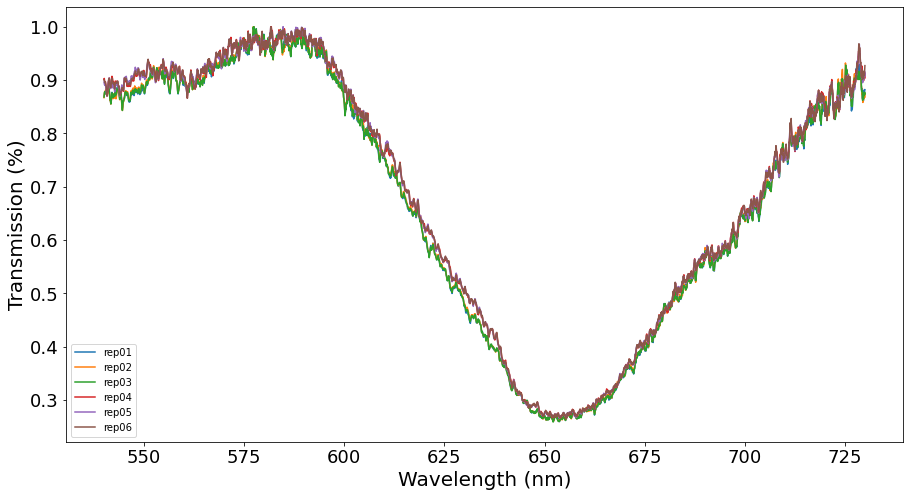

In [2]:
import lib.data_process
import os
import pandas as pd
import lib.csv_helpers as csv

setup = csv.get_default_setup()
meta_df = csv.read_metadata(setup)

dp = lib.data_process.DataProcessor()
dp.apply_interpolate = False
dp.apply_normalise = True
dp.apply_trim = True
dp.apply_smooth = False

meta_df = csv.select_from_metadata('element', '01', meta_df)
meta_df = csv.select_from_metadata('fluid', 'BeerCorny1', meta_df)

merged_df, title = csv.merge_dataframes(setup, meta_df)
df = dp.process_dataframe(merged_df)
print(title)
df

lib.data_process.plot(df)

## Bulk Process
copy one dataset into another, can also be used for modifying a folder structure

In [1]:
import os
import lib.csv_helpers as csv
import pandas as pd

path='./dummydata'
metapath = os.path.join(path, "index.txt")

setup_in = csv.get_default_setup()
setup_out = csv.get_default_setup()

setup_out['path'] = 'bulkmerge_output'
setup_out['subdirs'] = ['sensor', 'fluid']

csv.bulk_process(setup_in, setup_out, delete_input=False, merge_out=False)


ERROR:root:[Errno 2] No such file or directory: 'dummydata/instrument01/waterA/instrument01-A01-waterA.txt'
Row will be removed from output metadata file
Check that setup_in['subdirs'] is set correctly
ERROR:root:[Errno 2] No such file or directory: 'dummydata/instrument01/waterA/instrument01-A02-waterA.txt'
Row will be removed from output metadata file
Check that setup_in['subdirs'] is set correctly
ERROR:root:[Errno 2] No such file or directory: 'dummydata/instrument01/waterA/instrument01-B01-waterA.txt'
Row will be removed from output metadata file
Check that setup_in['subdirs'] is set correctly
ERROR:root:[Errno 2] No such file or directory: 'dummydata/instrument01/waterA/instrument01-B02-waterA.txt'
Row will be removed from output metadata file
Check that setup_in['subdirs'] is set correctly
ERROR:root:[Errno 2] No such file or directory: 'dummydata/instrument01/waterA/instrument01-C01-waterA.txt'
Row will be removed from output metadata file
Check that setup_in['subdirs'] is set 

## Single Measurements

Run some dummy measurements at various wavelengths to check they merge correctly

In [18]:
import lib.csv_helpers as csv

setup = csv.get_default_setup()
element = 'A02'
fluid = 'asdf'

setup['wavelength_range'] = [400, 420, 0.5]
csv.simple_measurement(setup, element, fluid, csv.dummy_measurement)
setup['wavelength_range'] = [390, 410, 0.5]
df = csv.simple_measurement(setup, element, fluid, csv.dummy_measurement)
df




INFO:root:Saving into new file dummydata/instrument01/asdf/instrument01-A02-asdf.txt
INFO:root:Merging into existing dummydata/index.txt
INFO:root:Merging into existing dummydata/instrument01/asdf/instrument01-A02-asdf.txt
INFO:root:Merging into existing dummydata/index.txt


,wavelength,1647256382.994453,1647256383.020605
0,390.0,NaN,0.934341
1,390.5,NaN,0.159506
2,391.0,NaN,0.485793
3,391.5,NaN,0.118181
4,392.0,NaN,0.181326
5,392.5,NaN,0.432854
6,393.0,NaN,0.744847
7,393.5,NaN,0.435029
8,394.0,NaN,0.910408
9,394.5,NaN,0.973651


In [7]:
import time
import numpy as np

# import the usb driver
import stellarnet_mac.stellarnet_driver3 as sn

import logging
logging.basicConfig(format='%(asctime)s %(message)s')

def getSpectrum(spectrometer, wav, inttime, scansavg, smooth):
    logging.warning('requesting spectrum')
    spectrometer['device'].set_config(int_time=inttime, scans_to_avg=scansavg, x_smooth=smooth)
    spectrometer['device'].print_info()
    spectrum = sn.array_spectrum(spectrometer, wav)
    logging.warning('recieved spectrum')
    return spectrum
    
spectrometer, wav = sn.array_get_spec(0)


       
inttime = 100
scansavg = 1
smooth = 1 

logging.warning('displaying spectrum')
data=getSpectrum(spectrometer, wav, inttime, scansavg, smooth)
data



2022-03-18 14:16:53,270 displaying spectrum
2022-03-18 14:16:53,270 requesting spectrum


--- Device Information
idVendor:      0BD7
idProduct:     A012


USBError: [Errno 32] Pipe error

In [16]:
import pymongo

connection = pymongo.MongoClient('localhost', 27017)

database = connection['mydb_01']

collection = database['mycollection01']

data = {'name' : 'Calum'}

collection.insert_one(data)

collection.update_one

In [3]:
import lib.csv_helpers as csv
import lib.json_setup as json_setup
import os
os.chdir('/Users/calum/spectrometer/')

#Folder containing text/csv files to import
input_dir = "/Users/calum/git/Glasgow/sampleData/combined"

# Construct a regex to extract metadata from the filename
# example 'HAN24_Sensor9_BeerBitter3_Rotation2.txt'
# regex = '(?P<sensor>.+)_Sensor(?P<element>.+)_(?P<fluid>.+)_Rotation(?P<rotation>.+).txt'
regex = '(?P<sensor>.+)_Sensor(?P<element>.+)_(?P<fluid>.+)_Rotation(.+).txt'

# setup = csv.get_default_setup()
setup_path = "/Users/calum/spectrometer/setup/HAN24.json"
setup = json_setup.json_to_dict(setup_path)
meta_df = csv.read_metadata(setup)
csv.write_meta_df_txt(setup, meta_df)
meta_df


# meta_df.to_csv(temp_buffer, index=True, sep='\t', na_rep='', date_format='%Y-%m-%d')
# temp_buffer.seek(0)
# temp_buffer.read()
# mod_df = pd.read_csv(temp_buffer,
#                         sep='\t',
#                         index_col='index',
#                         parse_dates=['date'],
#                         dtype=dtypes,
#                         keep_default_na = False
#                         )

# mod_df
# csv.import_dir_to_csv(setup, input_dir, regex)
# json_setup.dict_to_json(setup, setup_path, overwrite=False)

{'name': 'HAN24',
 'category': 'setup',
 'metafile': 'index.txt',
 'datadir': 'dummydata',
 'subdirs': ['sensor', 'fluid'],
 'primary_metadata': ['sensor', 'element', 'fluid'],
 'instrument': {'name': 'default_instrument',
  'category': 'instrument',
  'light Source': 'Stellarnet LED White',
  'spectrometer': 'Stellarnet BlueWave VIS-25'},
 'sensor': {'name': 'HAN24',
  'category': 'sensor',
  'layout': {'name': 'HAN24_layout',
   'category': 'layout',
   'map': {'01': ['', ''],
    '02': ['', ''],
    '03': ['', ''],
    '04': ['', ''],
    '05': ['', ''],
    '06': ['', ''],
    '07': ['', ''],
    '08': ['', ''],
    '09': ['', ''],
    '10': ['', ''],
    '11': ['', ''],
    '12': ['', ''],
    '13': ['', ''],
    '14': ['', ''],
    '15': ['', '']}},
  'structure_map': {'name': 'HAN24_structure',
   'category': 'structure_map',
   'valid_layout': 'HAN24_layout',
   'map': {'01': ['', ''],
    '02': ['', ''],
    '03': ['', ''],
    '04': ['', ''],
    '05': ['', ''],
    '06': [''

,date,instrument,sensor,element,structure,surface,fluid,repeats,comment
index,,,,,,,,,
default_sensor-A01-waterA,2022-03-30,default_instrument,default_sensor,A01,Al,None,waterA,2,
default_sensor-A01-waterAaa,2022-03-30,default_instrument,default_sensor,A01,Al,None,waterAaa,1,
HAN24-10-BeerBitter1,2022-03-30,default_instrument,HAN24,10,,,BeerBitter1,24,
HAN24-10-BeerBitter2,2022-03-30,default_instrument,HAN24,10,,,BeerBitter2,24,
HAN24-10-BeerBitter3,2022-03-30,default_instrument,HAN24,10,,,BeerBitter3,24,
...,...,...,...,...,...,...,...,...,...
HAN24-09-BeerCorny3,2022-03-30,HAN24sample,HAN24,09,s,s,BeerCorny3,6,
HAN24-09-BeerMusty1,2022-03-30,HAN24sample,HAN24,09,s,s,BeerMusty1,6,
HAN24-09-BeerMusty2,2022-03-30,HAN24sample,HAN24,09,s,s,BeerMusty2,6,


INFO:root:Merging into existing dummydata/index.txt


,date,instrument,sensor,element,structure,surface,fluid,repeats,comment
index,,,,,,,,,
default_sensor-A01-waterA,2022-03-30,default_instrument,default_sensor,A01,Al,None,waterA,2,
default_sensor-A01-waterAaa,2022-03-30,default_instrument,default_sensor,A01,Al,None,waterAaa,1,
HAN24-10-BeerBitter1,2022-03-30,default_instrument,HAN24,10,,,BeerBitter1,24,
HAN24-10-BeerBitter2,2022-03-30,default_instrument,HAN24,10,,,BeerBitter2,24,
HAN24-10-BeerBitter3,2022-03-30,default_instrument,HAN24,10,,,BeerBitter3,24,
...,...,...,...,...,...,...,...,...,...
HAN24-09-BeerCorny3,2022-03-30,HAN24sample,HAN24,09,s,s,BeerCorny3,6,
HAN24-09-BeerMusty1,2022-03-30,HAN24sample,HAN24,09,s,s,BeerMusty1,6,
HAN24-09-BeerMusty2,2022-03-30,HAN24sample,HAN24,09,s,s,BeerMusty2,6,


INFO:root:filtering by metadata "fluid" == "Beer"
INFO:root:filtering by metadata "element" == "01"


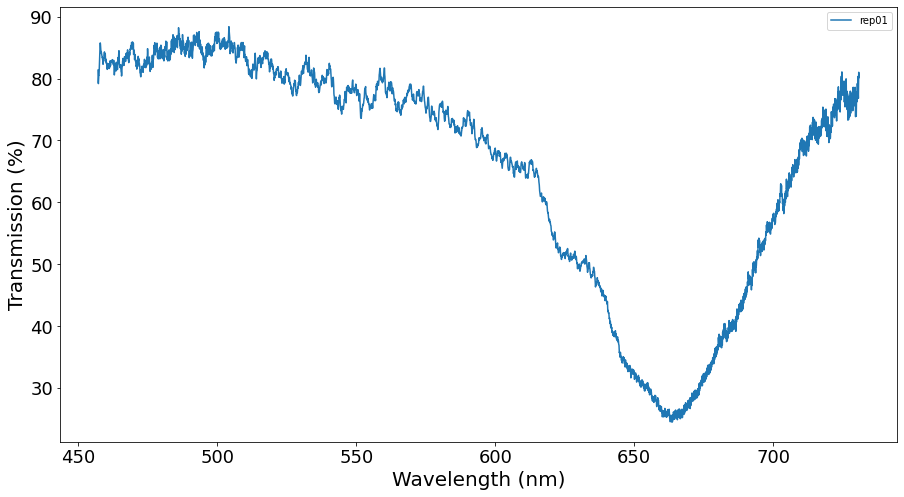

baseline=82.5558 height=58.015800000000006 hm=53.5479 72.80500000000006


(72.80500000000006, 58.015800000000006, 82.5558)

In [30]:
import lib.csv_helpers as csv
import lib.data_process
os.chdir('/Users/calum/spectrometer/')


setup = csv.get_default_setup()
meta_df = csv.read_metadata(setup)
meta_df = csv.select_from_metadata('fluid', 'Beer', meta_df)
meta_df = csv.select_from_metadata('element', '01', meta_df)
# meta_df = csv.select_from_metadata('sensor', 'DUM01', meta_df)

dp = lib.data_process.DataProcessor()
dp.apply_normalise = True
dp.apply_smooth = True
dp.apply_trim = True
dp.apply_interpolate = True
dp.apply_round = True

dp.smooth_points = 3
dp.wavelength_trim_min = 540
dp.wavelength_trim_max = 730
dp.round_decimals = 3
dp.interpolate_sampling_rate = 1.0

data = csv.merge_dataframes(setup, meta_df)
# data[0].iloc[:, :2]
df = data[0].iloc[:, :2]
lib.data_process.plot(df)

for col in df:
    if col == 'wavelength':
        pass
    else:
        baseline=df[col][1:101].mean()
        min = df[col][1:].min()
        height = baseline - min
        hm = min + (height/2)
        flagdown=0
        flagup=0
        for i in range(30,len(df[col])):
            value=df[col][i]
            if value<=hm and flagdown==0:
                flagdown=1
                side1=df['wavelength'][i]
            if value>=hm and flagdown==1 and flagup==0 and df['wavelength'][i]-side1>10:
                flagup=1
                side2=df['wavelength'][i]
            if flagup==1 and flagdown==1:
                break
        if flagup==0:
            side2=0
            side1=0
        fwhm_num=side2-side1
        print(f'{baseline=} {height=} {hm=} {fwhm_num}')

# export = csv.export_dataframes(setup, meta_df, dp=dp, outfile='export.txt')
# export